## **OpenCV**: Detección de figuras con Transformada de Hough

En este laboratorio, nuestro objetivo será entender las técnicas de detección de objetos usando Hough Line/Circle Transform

La transformada de Hough es un método de extracción de características para detectar formas simples. Una forma "simple" es aquella que puede representarse con unos pocos parámetros.

Por ejemplo, una línea puede representarse con dos parámetros (pendiente, intersección) y un círculo tiene tres parámetros: las coordenadas del centro y el radio (x, y, r). La transformada de Hough realiza un excelente trabajo a la hora de encontrar este tipo de formas en una imagen.

La principal ventaja de utilizar la transformada de Hough es que es insensible a la oclusión.

# Hough Line Transform

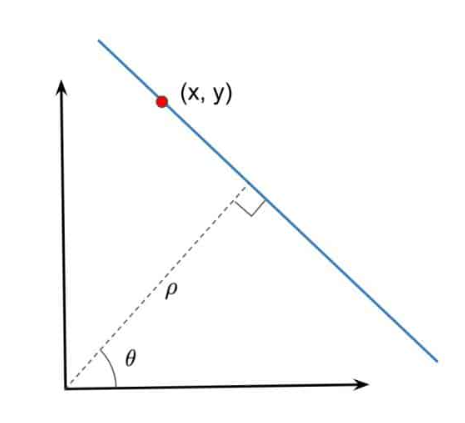

Usando la representación polar de una línea, sabemos que **ρ** representa la distancia perpendicular y **θ** es el ángulo en radianes.

**¿Por qué usamos la representación polar de la línea?**

La razón de eso es porque en la fórmula "y = mx + n" la pendiente **m** puede tomar valores infinitos positivo y negativo y para la transformada de Hough los parámetros deben estar acotados.

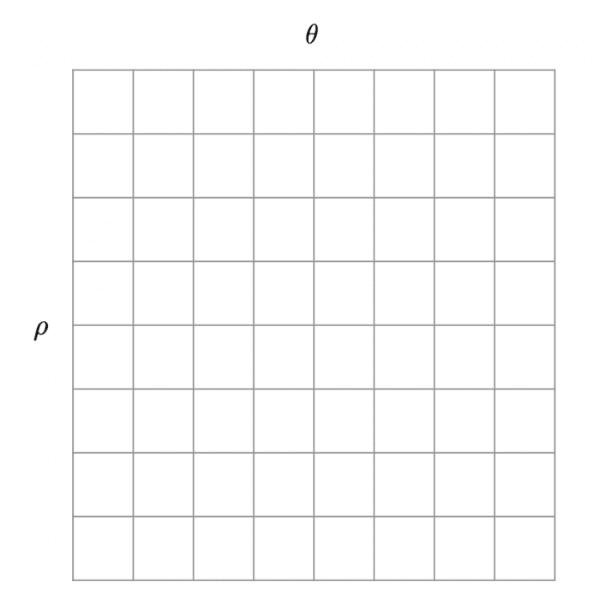

Esto de arriba es un "**accumulator**" o acumulador. Es un array 2D donde "acumularemos" las pruebas sobre qué líneas existen en la imagen. La primera celda corresponderá a (-R, 0), mientras que la última corresponderá a (R, π)

#  Paso 1: Inicializar el acumulador

El número de celdas que elijas tener es una decisión de diseño. Digamos que eliges un acumulador de 10×10. Esto significa que puedes tomar sólo 10 valores distintos al igua que el acumulador y, por lo tanto, serás capaz de detectar 100 tipos diferentes de líneas.

El tamaño del acumulador también dependerá de la resolución de la imagen.

# Paso 2: Detectar Bordes

**¿Cómo recogemos las pruebas para saber cuántas líneas hay?**

La idea es que si hay una línea visible en la imagen, se dispare un detector de bordes en los límites de la línea. Estos píxeles de borde proporcionan pruebas de la presencia de una línea.

# Paso 3: Votación por píxeles de borde

Para cada píxel de borde (x, y) de la matriz anterior, variamos los valores de θ desde 0 a π y los introducimos en la ecuación 1 para obtener un valor para ρ.

En la figura siguiente, variamos los valores de θ para tres píxeles (representados por las tres curvas de color) y obtenemos los valores de ρ mediante la ecuación 1.

Como pueden ver, estas curvas se cruzan en un punto, lo que indica que los valores de las curvas son iguales.

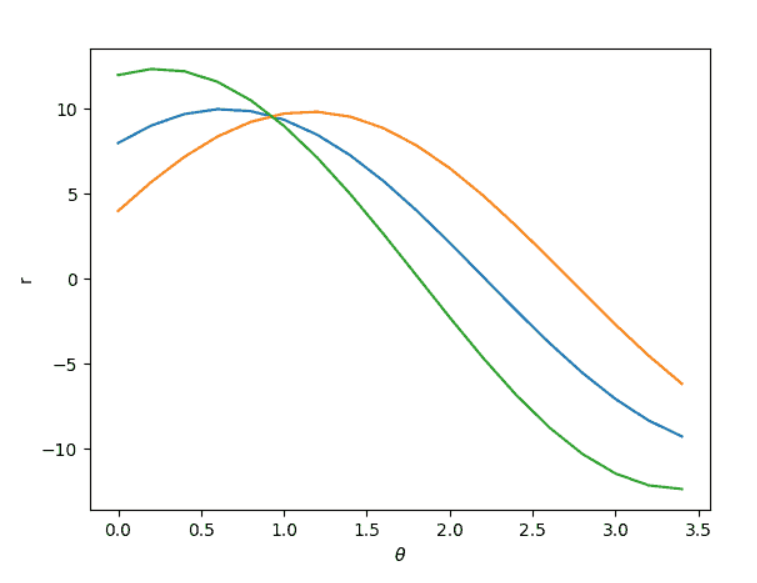

Normalmente, se tiene cientos de píxeles de borde y el acumulador se utiliza para encontrar la intersección de todas las curvas generadas por estos píxeles.

Digamos que nuestro acumulador tiene un tamaño de 20×20. Así, hay 20 valores distintos de θ por lo que para cada píxel de borde (x, y), podemos calcular 20 (ρ, θ) pares mediante el uso de la ecuación 1. La casilla del acumulador correspondiente a estos 20 valores de (ρ, θ) se incrementa.


Si hacemos esto para cada píxel de borde, ahora tenemos un acumulador que tiene todas las pruebas sobre todas las posibles líneas de la imagen.

Podemos simplemente seleccionar las celdas del acumulador por encima de un determinado umbral para encontrar las líneas en la imagen. Si el umbral es más alto, encontraremos menos líneas fuertes, y si es más bajo, encontraremos un gran número de líneas incluyendo algunas débiles.

# Hough Line Transform en OpenCV

En OpenCV, la detección de líneas mediante la transformada de Hough se implementa en la función **HoughLines()** y **HoughLinesP()** [Probabilistic Hough Transform]. Esta función toma los siguientes argumentos:



*   **edges**: Output del detector de bordes
*   **lines**: Un vector para almacenar las coordenadas del inicio y final de la línea.
*   **rho**: El parámetro de resolución en píxeles.
*   **theta**: La resolución del parámetro en radianes.
*   **threshold**: El número mínimo de puntos de intersección para detectar una línea.


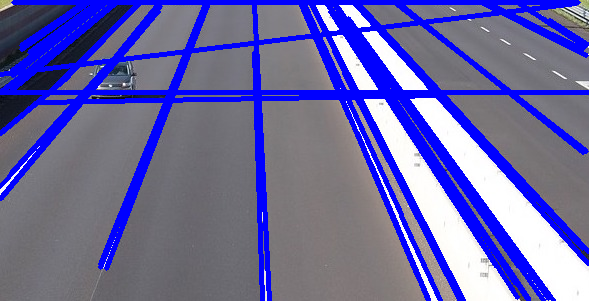

In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Lectura de la imagen
img = cv2.imread('lanes.jpg', cv2.IMREAD_COLOR)

# Pasamos a Escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Usamos Canny para detectar bordes
edges = cv2.Canny(gray, 50, 200)

# Detectamos puntos que formen una línea
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=10, maxLineGap=250)

# Dibujamos las lineas encontradas
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)


cv2_imshow(img)

**TAREA**: *Cambien el valor de threshold y vean como cambia la imagen en relacion a la deteccion de las lineas*

# Hough Circle Transform en OpenCV

A diferencia de la detección de líneas, para detectar círculos necesitaremos 3 parámetros:


*   (X, Y) del centro del círculo
*   Radio del círculo

Debido a que ahora necesitamos 3 parámetros, el acumulador ya no será un array 2D, sino uno 3D.

La función función **HoughCircles()** se utiliza en OpenCV para detectar los círculos en una imagen. Esta función toma los siguientes parámetros:



*   image = imagen de entrada
*   method = método de detección
*   dp = relación inversa entre la resolución del acumulador y la resolución de la imagen
*   mindst = distancia mínima entre los centros de los círculos detectados
*   param_1, param2 = parámetros específicos del método
*   min_Radius = radio mínimo del círculo a detectar
*   max_Radius = radio máximo del círculo a detectar





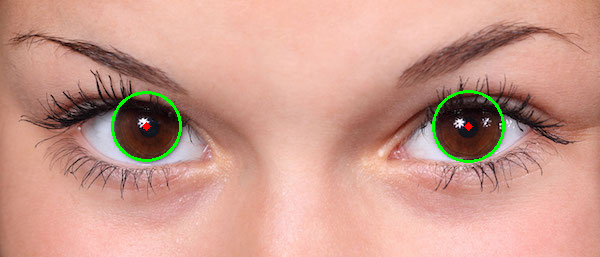

In [41]:
# Lectura de la imagen
img = cv2.imread('brown-eyes.jpg', cv2.IMREAD_COLOR)

# Pasamos a Escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicamos el HoughCircles
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=105, param2=42, minRadius=25, maxRadius=50)

# Dibujamos los círculos
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Circulo Exterior
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Circulo Interior
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)


cv2_imshow(img)

**Tarea**: *Vayan cambiando los parámetros de la función HoughCircles() y vean como cambia la imagen*